In [28]:
import pandas as pd

In [29]:
df=pd.read_csv('flight_delays_train.csv')

In [30]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [31]:
df['Month'] = df['Month'].apply(lambda x: int(x.split('-')[1]))
df['DayofMonth'] = df['DayofMonth'].apply(lambda x: int(x.split('-')[1]))
df['DayOfWeek'] = df['DayOfWeek'].apply(lambda x: int(x.split('-')[1]))

In [32]:
df

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,N
99996,1,18,3,804,CO,EWR,DAB,884,N
99997,1,24,2,1901,NW,DTW,IAH,1076,N
99998,4,27,4,1515,MQ,DFW,GGG,140,N


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
numerical_columns = [col for col in df.columns if df[col].nunique() >=1300]
print(f'Numerical Columns: {numerical_columns}')

categorical_columns = df.columns.difference(numerical_columns).to_list()
print(f'Categorical Columns: {categorical_columns}')

Numerical Columns: ['DepTime', 'Distance']
Categorical Columns: ['DayOfWeek', 'DayofMonth', 'Dest', 'Month', 'Origin', 'UniqueCarrier', 'dep_delayed_15min']


<ipython-input-37-42edbbb40d88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_col, palette='viridis')
<ipython-input-37-42edbbb40d88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_col, palette='viridis')
<ipython-input-37-42edbbb40d88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat_col, palette='viridis')
<ipython-input-37-42edbbb40d88>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

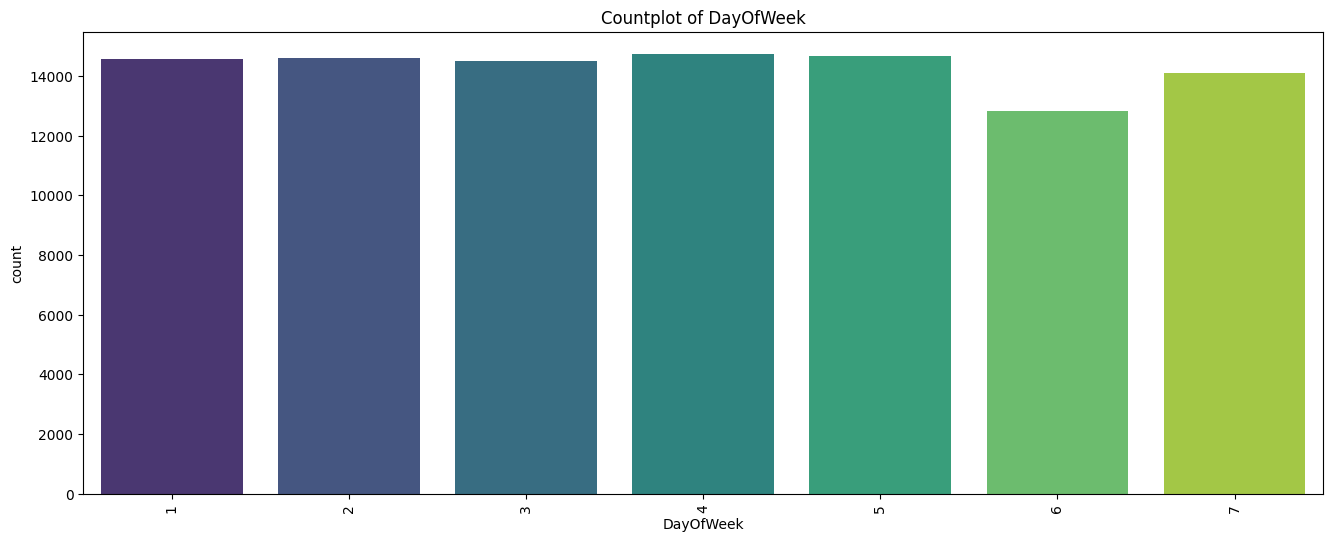

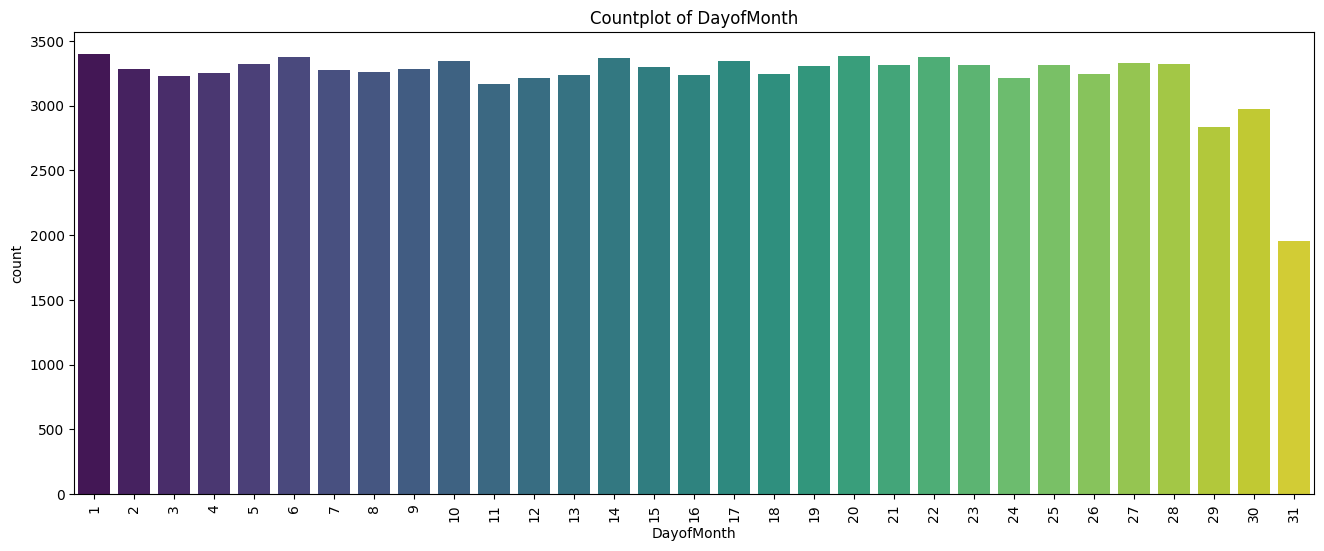

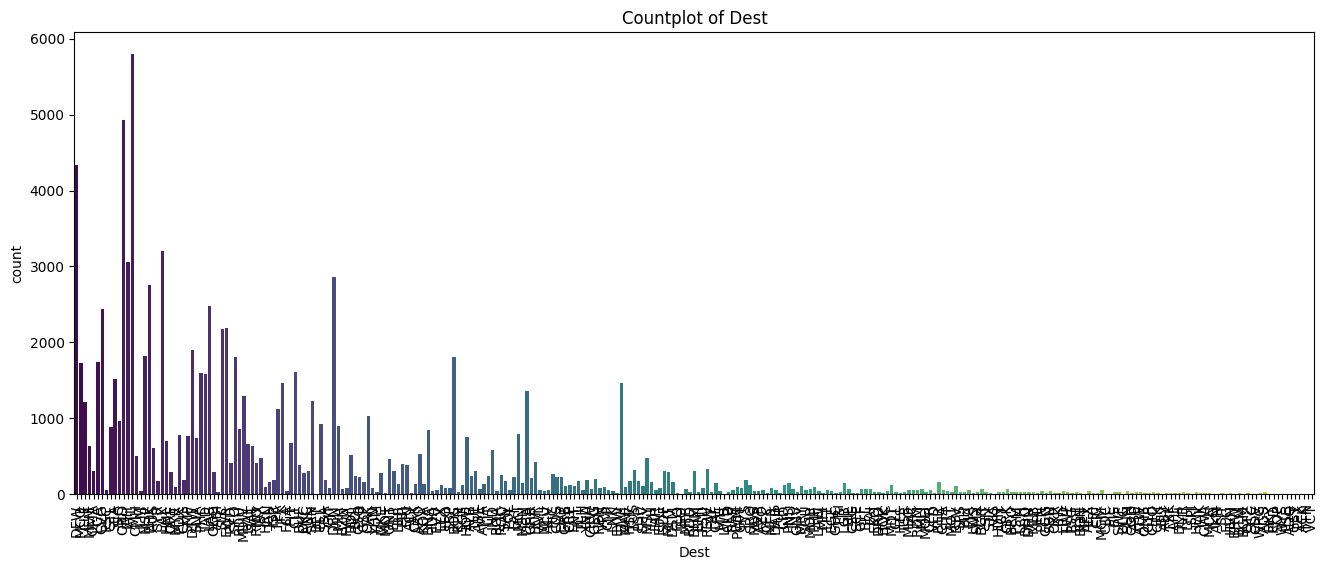

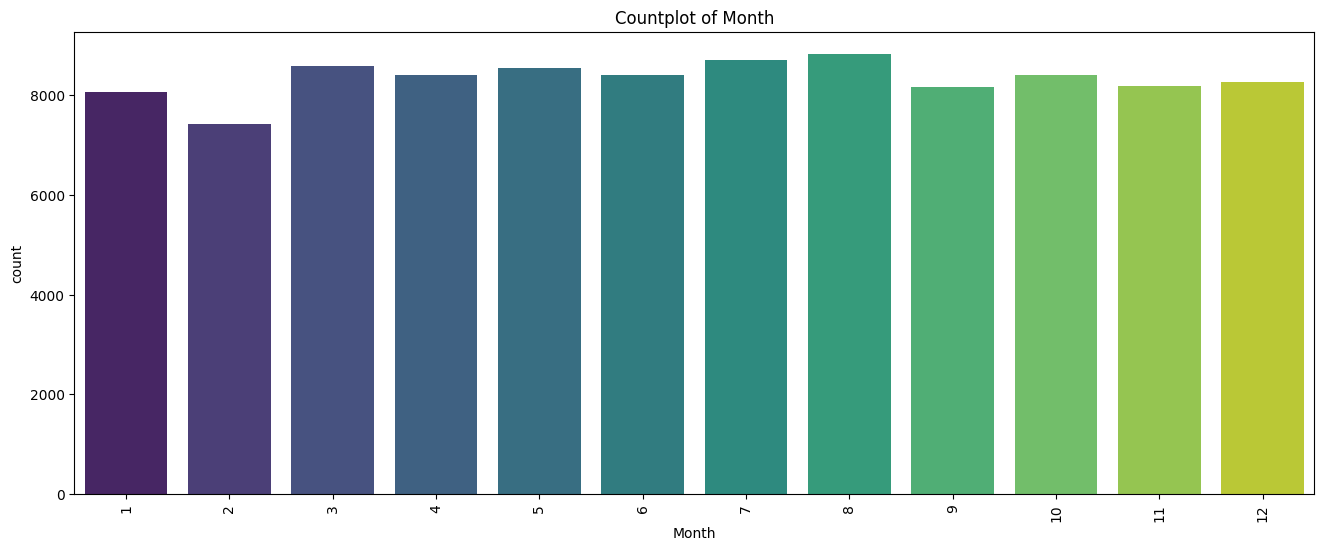

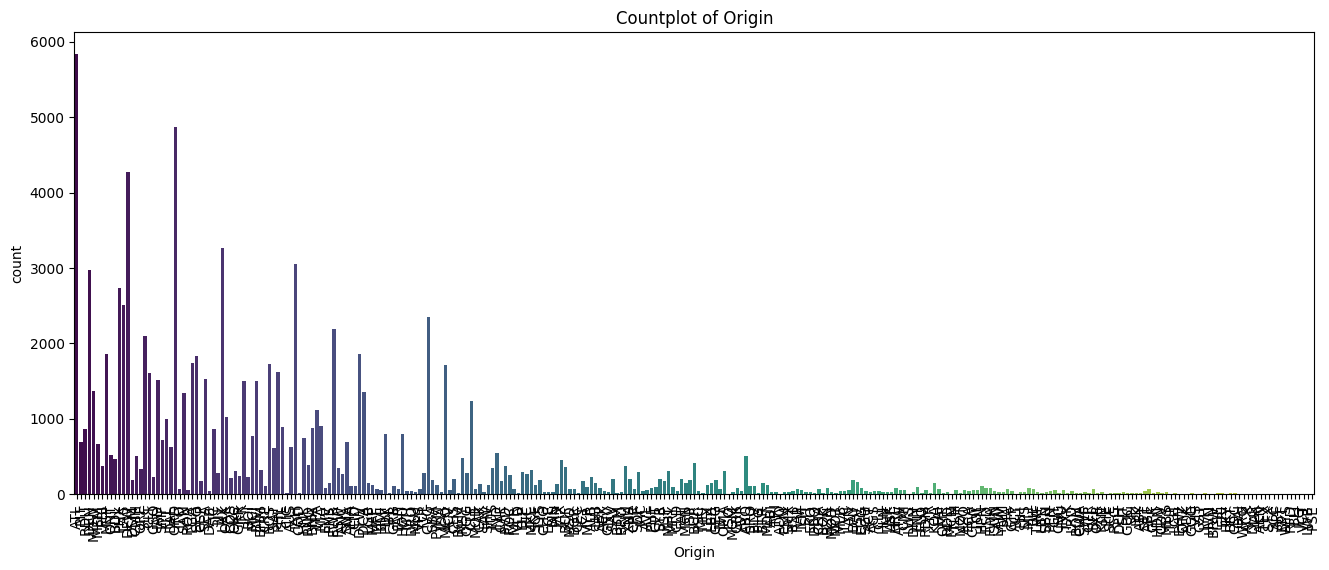

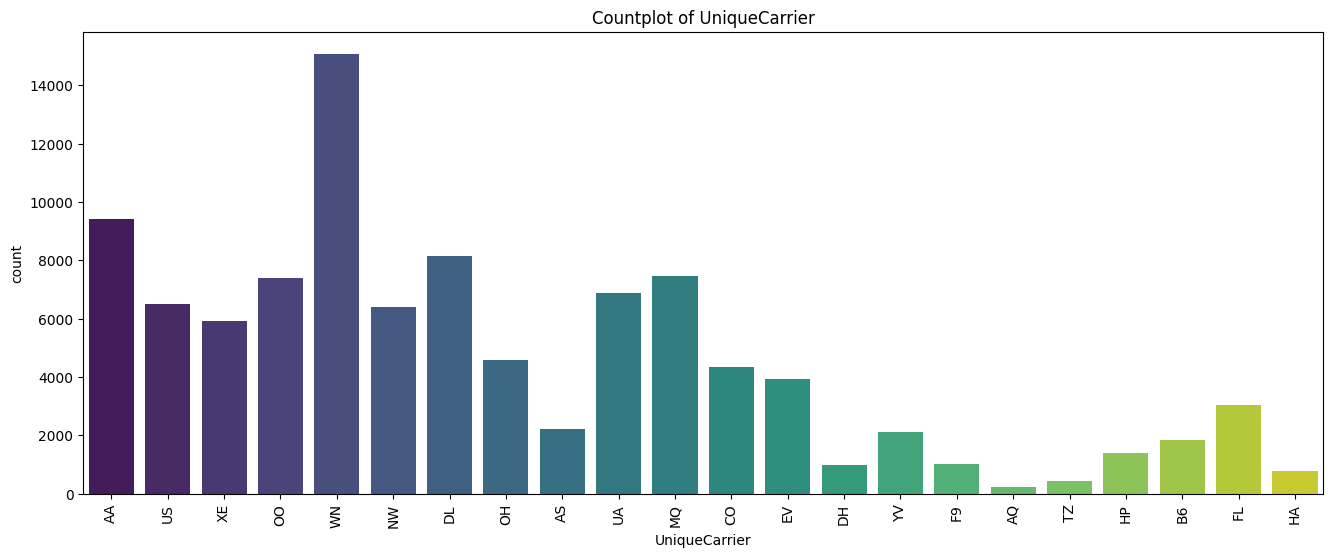

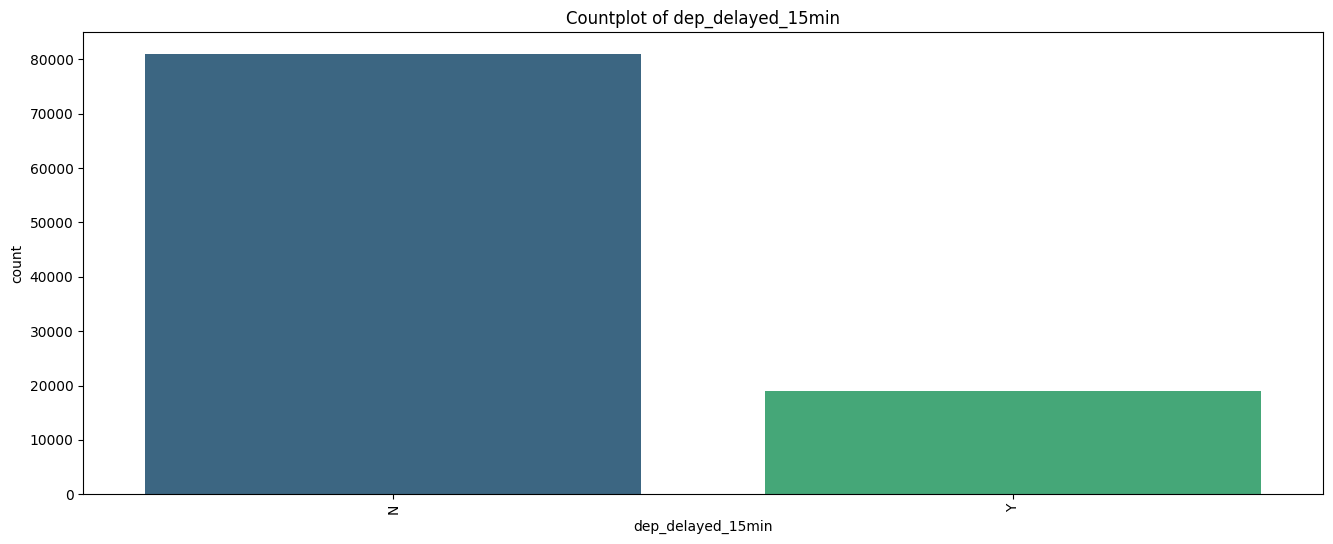

In [37]:
for cat_col in categorical_columns:
    plt.figure(figsize=(16, 6))
    plt.title(f'Countplot of {cat_col}')
    sns.countplot(data=df, x=cat_col, palette='viridis')
    plt.xticks(rotation=90)

In [9]:
d={'N':0,'Y':1}
df['dep_delayed_15min']=df['dep_delayed_15min'].map(d)

In [10]:
x=df.drop('dep_delayed_15min',axis=1)
y=df['dep_delayed_15min']

In [11]:
x=pd.get_dummies(x,drop_first=True)

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [14]:
g=GaussianNB()
b=BernoulliNB()

In [15]:
g.fit(x_train,y_train)

GaussianNB()

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [17]:
gtahmin=g.predict(x_test)

In [18]:
accuracy_score(gtahmin,y_test)

0.39495

In [19]:
confusion_matrix(gtahmin,y_test)

array([[ 4873,   752],
       [11349,  3026]])

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [39]:
model=Sequential()

model.add(Dense(120,activation='relu'))

model.add(Dense(80,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(30,activation='relu'))

model.add(Dense(20,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
from sklearn.preprocessing import normalize,scale

In [41]:
x=scale(x)

In [42]:
history=model.fit(x,y,epochs=40,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8037 - loss: 0.4840 - val_accuracy: 0.8074 - val_loss: 0.4571
Epoch 2/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8087 - loss: 0.4512 - val_accuracy: 0.8074 - val_loss: 0.4542
Epoch 3/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8110 - loss: 0.4423 - val_accuracy: 0.8074 - val_loss: 0.4560
Epoch 4/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.8102 - loss: 0.4415 - val_accuracy: 0.8074 - val_loss: 0.4536
Epoch 5/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8083 - loss: 0.4384 - val_accuracy: 0.8074 - val_loss: 0.4578
Epoch 6/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.8114 - loss: 0.4306 - val_accuracy: 0.8074 - val_loss: 0.4514
Epoch 7/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8075 - loss: 0.4310 - val_accuracy: 0.8074 - val_loss: 0.4546
Epoch 8/40
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8096 - loss: 0

In [43]:
import matplotlib.pyplot as plt

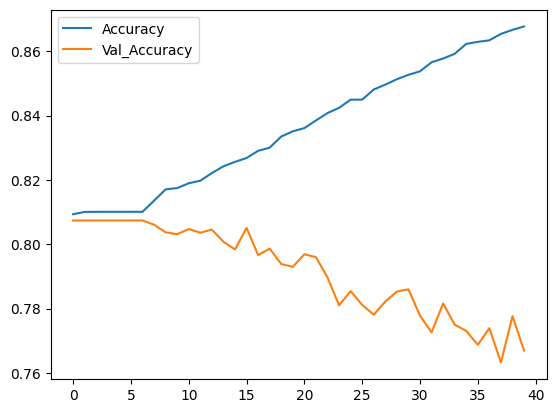

In [44]:
plt.plot(history.history['accuracy'],label='Accuracy')

plt.plot(history.history['val_accuracy'],label='Val_Accuracy')

plt.legend()